In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/input/water-potability/water_potability.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Water Potability

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [ ]:
#Some İmport Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px

# Data Pre-processing Libraries

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

#Modelling Libraries

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../input/water-potability/water_potability.csv")
df.head()

In [ ]:
df.info() #We see data types.

In [ ]:
df.shape #Our data consists of 3276 rows and 10 columns and is 2 dimensional.

In [ ]:
df.describe().T
#this part allows us to get to know the data a little bit, so we determine what we will do in the next stages.

# Exploration Data Analysis

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
sns.palplot(colors_dark)

In [ ]:

d= pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable : 1','Potable : 0'],hole=0.8,opacity=0.8,
            color_discrete_sequence=[colors_dark[0],colors_dark[4]],
             labels={'1' : 'Not Potable', '0' : 'Potable','Potability':'Sample Numbers'})

#fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   #x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')

fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

#fig.update_layout(
    #font_family='monospace',
    #title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
     #          font=dict(color=colors_dark[2],size=20)),
    #legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    #hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Missing Values


In [ ]:
df.isnull()

In [ ]:
df.isnull().any()

In [ ]:
plt.title('Missing Values')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='BuGn')

In [ ]:
mean_ph = df['ph'].mean()
df['ph'].fillna(mean_ph, inplace=True)
df['ph'].isnull().sum()

In [ ]:
mean_sulfate = df['Sulfate'].mean()
df['Sulfate'].fillna(mean_sulfate, inplace=True)
df['Sulfate'].isnull().sum()

In [ ]:
mean_trihalo = df['Trihalomethanes'].mean()
df['Trihalomethanes'].fillna(mean_trihalo, inplace=True)
df['Trihalomethanes'].isnull().sum()

In [ ]:
plt.title('Missing Values')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='BuGn')

In [ ]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_dark[0],colors_dark[4]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_dark[2],colors_dark[1]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()


As can be understood from the distributions, the data show a normal distribution. Also, when we look at the distribution graphs, there are outliers in the majority of the data.

In [ ]:
fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.distplot(df['ph'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 2)
sns.distplot(df['Hardness'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 3)
sns.distplot(df['Solids'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 4)
sns.distplot(df['Chloramines'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 5)
sns.distplot(df['Sulfate'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 6)
sns.distplot(df['Conductivity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 7)
sns.distplot(df['Organic_carbon'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 8)
sns.distplot(df['Trihalomethanes'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 9)
sns.distplot(df['Turbidity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
plt.show()

In [ ]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket")

While examining the correlation between variables, I noticed that there is almost no correlation between the variables.
I just tried to find some correlation between ph , hardness and solids, but as you can see it is very, very small.

In [ ]:
#Some Box Plots

In [ ]:
fig = px.box(df, x='Potability', y='ph', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Under normal conditions, the ph value of potable water should be between 6.5 and 8. However, here the ph degree of potable water can be very high and very low.
If we look at the outliers, we can see that the values ​​are unreasonable there, too. For example, he says that the water body with ph = 14 is drinkable. It is impossible for the water to be drinkable when the ph value is so high.
When we look at the data, I think these data are not real data, the person filling the data must have filled it in according to his mind.

In [ ]:
fig = px.box(df, x='Potability', y='Hardness', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Solids', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Chloramines', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Sulfate', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Conductivity', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Organic_carbon', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Trihalomethanes', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
fig = px.box(df, x='Potability', y='Turbidity', color="Potability", points='all')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

# Conclusion of Box Plots
When we look at Box Plots, we see that there are values at the very extremes of the data. These are outliers and they destroy the integrity of the data. For example, we saw that an observation with a pH of 14 is drinkable. We can probably die if we drink that water.
Since such observations distort the pattern of the data, I tried to fill them with means.
Also, there is one more thing I got out of here. It is very unlikely that these data are real data. Because the values of potable water were entered as very different values. I think the data set was prepared according to his own mind. I will continue the analysis anyway.


In [ ]:
#Fill outlier for ph
df_ph = df['ph']
Q1_ph = df_ph.quantile(0.25)
Q3_ph = df_ph.quantile(0.75)
IQR_ph = Q3_ph - Q1_ph
low = Q1_ph - 1.5 * IQR_ph
top = Q3_ph + 1.5 * IQR_ph
print(top)
print(low)

In [ ]:
(df_ph < low) | (df_ph > top)
outlier_ph = (df_ph < low) | (df_ph > top)
outlier_ph.head()
print('Sum of Outlier for PH:' , df_ph[outlier_ph].sum())

In [ ]:
print(df_ph.mean())
df_ph[outlier_ph] = df_ph.mean()

In [ ]:
#Fill outlier for Hardness
df_h = df['Hardness']
Q1_h = df_h.quantile(0.25)
Q3_h = df_h.quantile(0.75)
IQR_h = Q3_h - Q1_h
low_h = Q1_h - 1.5 * IQR_h
top_h = Q3_h + 1.5 * IQR_h
print(top_h)
print(low_h)

In [ ]:
(df_h < low_h) | (df_h > top_h)
outlier_h = (df_h < low_h) | (df_ph > top_h)
print('Sum of outlier for Hardness:' , df_h[outlier_h].sum())

In [ ]:
print(df_h.mean())
df_h[outlier_h] = df_h.mean()

In [ ]:
#Fill outlier for Solids
df_solids = df['Solids']
Q1_solids = df_solids.quantile(0.25)
Q3_solids = df_solids.quantile(0.75)
IQR_solids = Q3_solids - Q1_solids
low_s = Q1_solids - 1.5 * IQR_solids
top_s = Q3_solids + 1.5 * IQR_solids
print(top_s)
print(low_s)

In [ ]:
(df_solids < low_s) | (df_solids > top_s)
outlier_solids = (df_solids < low_s) | (df_solids > top_s)
print('Sum of outliers for Solids:' , outlier_solids.sum())

In [ ]:
print(df_solids.mean())
df_solids[outlier_solids] = df_solids.mean()

In [ ]:
#Fill outliers for Chloramins
df_ch = df['Chloramines']
Q1_ch = df_ch.quantile(0.25)
Q3_ch = df_ch.quantile(0.75)
IQR_ch = Q3_ch - Q1_ch
low_ch = Q1_ch - 1.5 * IQR_ch
top_ch = Q3_ch + 1.5 * IQR_ch
print(top_ch)
print(low_ch)

In [ ]:
(df_ch < low_ch) | (df_ch > top_ch)
outliers_ch = (df_ch < low_ch) | (df_ch > top_ch)
print('Sum of outlier for Chloramines:' , outliers_ch.sum())

In [ ]:
print(df_ch.mean())
df_ch[outliers_ch] = df_ch.mean()

In [ ]:
#Fill outlier for Conductivity
df_con = df['Conductivity']
Q1_con = df_con.quantile(0.25)
Q3_con = df_con.quantile(0.75)
IQR_con = Q3_con - Q1_con
low_con = Q1_con - 1.5 * IQR_con
top_con = Q3_con + 1.5 * IQR_con
print(top_con)
print(low_con)

In [ ]:
(df_con < low_con) | (df_con > top_con)
outliers_con = (df_ch < low_con) | (df_con > top_con)
print('Sum of outliers for Conductivity:' , outliers_con.sum())

In [ ]:
print(df_con.mean())
df_con[outliers_con] = df_con.mean()

In [ ]:
#Fill outlier for Organic Carbon
df_og = df['Organic_carbon']
Q1_og = df_og.quantile(0.25)
Q3_og = df_og.quantile(0.75)
IQR_og = Q3_og - Q1_og
low_og = Q1_og - 1.5 * IQR_og
top_og = Q3_og + 1.5 * IQR_og
print(top_og)
print(low_og)

In [ ]:
(df_og < low_og) | (df_og > top_og)
outliers_og = (df_og < low_og) | (df_og > top_og)
print('Sum of outliers for Organic Carbon:' , outliers_og.sum())

In [ ]:
print(df_og.mean())
df_og[outliers_og] = df_og.mean()

In [ ]:
#Fill outlier for Trihalomethanes
df_tr = df['Trihalomethanes']
Q1_tr = df_tr.quantile(0.25)
Q3_tr = df_tr.quantile(0.75)
IQR_tr = Q3_tr - Q1_tr
low_tr = Q1_tr - 1.5 * IQR_tr
top_tr = Q3_tr + 1.5 * IQR_tr
print(top_tr)
print(low_tr)

In [ ]:
(df_tr < low_tr) | (df_tr > top_tr)
outliers_tr = (df_tr < low_tr) | (df_tr > top_tr)
print('Sum of outliers for Trihalomethanes:' , outliers_tr.sum())

In [ ]:
print(df_tr.mean())
df_tr[outliers_tr] = df_tr.mean()

In [ ]:
#Fill outlier for Turbidity
df_tur = df['Turbidity']
Q1_tur = df_tur.quantile(0.25)
Q3_tur = df_tur.quantile(0.75)
IQR_tur = Q3_tur - Q1_tur
low_tur = Q1_tur - 1.5 * IQR_tur
top_tur = Q3_tur + 1.5 * IQR_tur
print(low_tur)
print(top_tur)

In [ ]:
(df_tur < low_tur) | (df_tur > top_tur)
outliers_tur = (df_tur < low_tur) | (df_tur > top_tur)
print('Sum of outliers for Turbidity:' , outliers_tur.sum())

In [ ]:
print(df_tur.mean())
df_tur[outliers_tur] = df_tur.mean()

# Standardizing The Data

In [ ]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [ ]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
lastresults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    lastresults.append((name,score))
    
lastresults.sort(key=lambda k:k[1],reverse=True)

In [ ]:
print('The Results Feelig Good:' , lastresults)

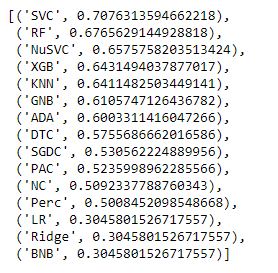

In [ ]:
# even with such data, we got a good result from svc

# Hyperparameter Tuning

In [ ]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[20,50,100,200,400],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
dff=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
dff

# Final Model

In [ ]:
param=dff['Parameters']
model = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**param[0])),
                                     ('RF',RandomForestClassifier(**param[1])),
                                    ],voting='hard')

accuracy=[]
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)    

In [ ]:
np.mean(accuracy)

# Conclusion
Our final model gave a result of 65 percent. In fact, even for such a data set, the value of 65 percent is high because the observations of the variables are mostly wrong. The values in the variables are just written so there is no accuracy margin.
7 percent accuracy of all variables for total potable water.This shows that most of the observations in the data were entered incorrectly.In addition, it can be said that there is no correlation between the variables.Despite this, we continued the analysis and got a result of 65 percent, but I think this result is meaningless.
Thanksss...